Dada la teoria desarrollada en las notas del 14 de diciembre. Se busca hacer un ejemplo para poner en practica estas ideas.

## Generacion del arbol con su etiquetado

## Multi-type Branching process

Se especifica la matriz de transicion de etiquetas, y la distribucion de hijos para cada tipo de padre.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import scipy

In [2]:
from Funciones_auxiliares import *

## Definir la matriz de transicion y las distribuciones de hijos para cada tipo

In [3]:
# usar 3 etiquetas para el ejemplo
etiquetas = ['red', 'blue', 'green']

Definir la matriz de transicion en las etiquetas

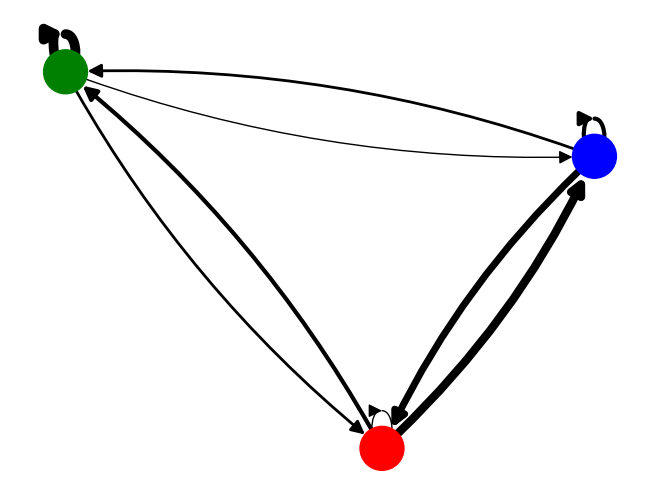

In [4]:
# definir la matriz de transicion
transition_matrix = np.array([[0.1, 0.6, 0.3],
                              [0.5, 0.3, 0.2],
                              [0.2, 0.1, 0.7]])

#transition_matrix = generate_random_transition_matrix(etiquetas)

# comprobar que tenga tantas entradas como etiquetas hay
# matriz cuadrada
assert transition_matrix.shape[0] == transition_matrix.shape[1]
# tenga entradas para todas las etiqueta
assert transition_matrix.shape[0] == len(etiquetas)

# comprobar que es matriz de transicion
assert comprobar_matriz_probabilidad(transition_matrix)

# ver la matriz de transicion
visualize_markov_chain(etiquetas, transition_matrix)

Definir la distribucion de hijos para cada tipo

Definir cada distribucion con un diccionario del tipo

valor: probabilidad

In [5]:
offspring_rojo  = {0:0.0, 1: 0.6, 2: 0.3, 3: 0.1}
offspring_azul  = {0:0.0, 1: 0.5, 2: 0.1, 3: 0.4}
offspring_verde = {0:0.0, 1: 0.3, 2: 0.3, 3: 0.4}

# ponerlas todas en una lista
offspring_distributions = [offspring_rojo,
                          offspring_azul,
                          offspring_verde]

# checar que todas sumen a 1
for offspring in offspring_distributions:
    assert checar_distribucion(offspring)

Creando y etiquetando la generacion: 1
	Numero de nodos en esta generacion: 1 
Creando y etiquetando la generacion: 2
	Numero de nodos en esta generacion: 3 
Creando y etiquetando la generacion: 3
	Numero de nodos en esta generacion: 7 


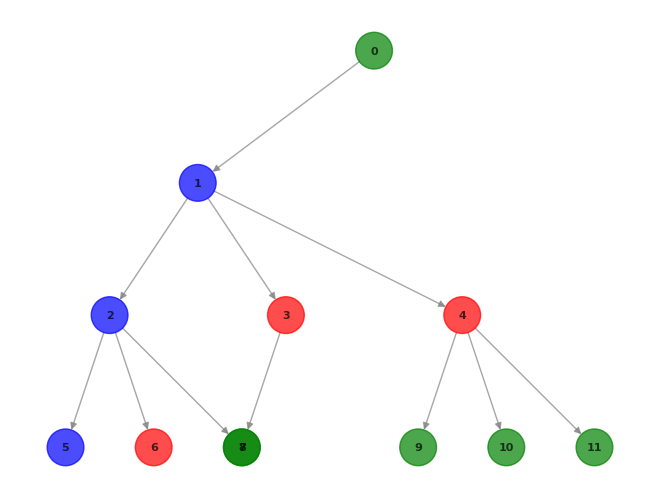

In [6]:
# hacer un arbol pequeño para ver si funciona
grafo, _ = generar_arbol_etiquetado(numero_de_generaciones = 3, offspring_distributions = offspring_distributions,
                                 transition_matrix = transition_matrix, indice_etiqueta_raiz = 2, etiquetas=etiquetas)

draw_tree(grafo, root = 0, colores=True)

In [7]:
# tomar el vector H, de las esperanzas
vector_H = [esperanza_distribucion(offspring) for offspring in offspring_distributions]
vector_H

[1.5, 1.9000000000000001, 2.1]

In [8]:
np.mean(vector_H)

1.8333333333333333

In [9]:
# hacer la matriz H
H = np.diag(vector_H)
H

array([[1.5, 0. , 0. ],
       [0. , 1.9, 0. ],
       [0. , 0. , 2.1]])

In [10]:
# la matriz P es la traspuesta de esta, por como se considera en la teoria
P = transition_matrix.T
P

array([[0.1, 0.5, 0.2],
       [0.6, 0.3, 0.1],
       [0.3, 0.2, 0.7]])

In [11]:
# multiplicarlas
PH = np.dot(P, H)
PH

array([[0.15, 0.95, 0.42],
       [0.9 , 0.57, 0.21],
       [0.45, 0.38, 1.47]])

## Ejemplo

In [12]:
v = np.array([3, 4, 5])
np.dot(PH, v)

array([ 6.35,  6.03, 10.22])

In [13]:
v = np.array([1, 1, 1])
np.dot(PH, v)

array([1.52, 1.68, 2.3 ])

In [14]:
v = np.array([4, 4, 8])
np.dot(PH, v)

array([ 7.76,  7.56, 15.08])

## PH converge?

In [15]:
np.linalg.matrix_power(PH, 100)

array([[1.21318343e+27, 1.40989412e+27, 1.88878188e+27],
       [1.19415053e+27, 1.38777514e+27, 1.85914992e+27],
       [2.34384179e+27, 2.72388220e+27, 3.64908206e+27]])

In [16]:
np.linalg.matrix_power(PH, 200)

array([[7.58244574e+54, 8.81189552e+54, 1.18049635e+55],
       [7.46348931e+54, 8.67365099e+54, 1.16197625e+55],
       [1.46491064e+55, 1.70243744e+55, 2.28069111e+55]])

## Espectro de PH

In [17]:
eigenvalores, eigenvectores = np.linalg.eig(PH)

In [18]:
eigenvalores

array([-0.60026548,  0.89373936,  1.89652612])

In [19]:
eigenvectores

array([[ 0.79653901, -0.38102875,  0.4188024 ],
       [-0.60132031, -0.60672972,  0.41223206],
       [-0.0627653 ,  0.69763611,  0.80911636]])

In [20]:
idx_eig = 0

In [21]:
eigenvalor = eigenvalores[idx_eig]
eigenvector = eigenvectores[:, idx_eig]
eigenvalor

-0.6002654753835317

In [22]:
v = eigenvector
v

array([ 0.79653901, -0.60132031, -0.0627653 ])

In [23]:
np.dot(PH, v)

array([-0.47813487,  0.36095182,  0.03767584])

In [24]:
v * eigenvalor

array([-0.47813487,  0.36095182,  0.03767584])

## Curiosidades

Note que $(PH)^n v$ si depende de $v$.

Sin embargo, las proporciones se mantienen.

Estas proporciones no son la distribucion limite.

In [25]:
n = 100
PH_n = np.linalg.matrix_power(PH, n)

In [26]:
# multiplticar por un vector, ver proporciones
v = np.array([4, 1, 2])

resultado = np.dot(PH_n, v)
#print(resultado)

# normalizar
resultado_normalizado = resultado/resultado.sum()
print(resultado_normalizado)

[0.25534383 0.2513379  0.49331827]


In [27]:
# multiplticar por un vector, ver proporciones
v = np.random.randint(0,11, 3)

resultado = np.dot(PH_n, v)
#print(resultado)

# normalizar
resultado_normalizado = resultado/resultado.sum()
print(resultado_normalizado)

[0.25534383 0.2513379  0.49331827]


In [28]:
# la proporcion a la que converge
# claramente es la proporicon de las columnas de PH_n
id_columna = 2
PH_n[:, id_columna]/PH_n[:, id_columna].sum()

array([0.25534383, 0.2513379 , 0.49331827])

In [29]:
# comparar con la limite, no es igual, solo un poco parecida
get_distribucion_limite(transition_matrix)

La cadena es irreducible
La cadena es aperiodica


[0.2602739726027397, 0.2876712328767123, 0.452054794520548]

## Perron–Frobenius Theorem

Comprobar unas cosas de ese teorema. Se puede consultar en EXTINCTION IN SINGLE AND MULTI-TYPE BRANCHING PROCESSES.


https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem

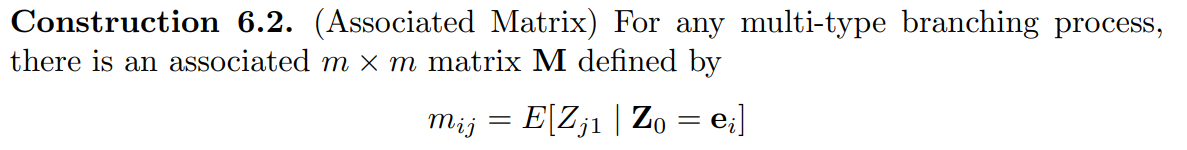

Por la construccion de la matriz, la matriz M del teorema es igual a $(PH)^T$


In [30]:
# Por la construccion de la matriz, la matriz M del teorema es igual a PH
M = PH.T

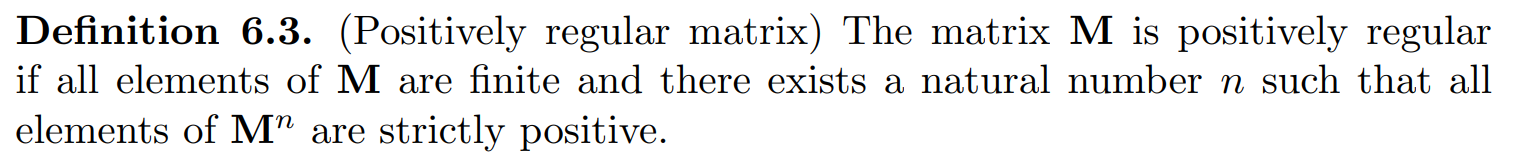

In [31]:
M

array([[0.15, 0.9 , 0.45],
       [0.95, 0.57, 0.38],
       [0.42, 0.21, 1.47]])

Claramente M es positively regular

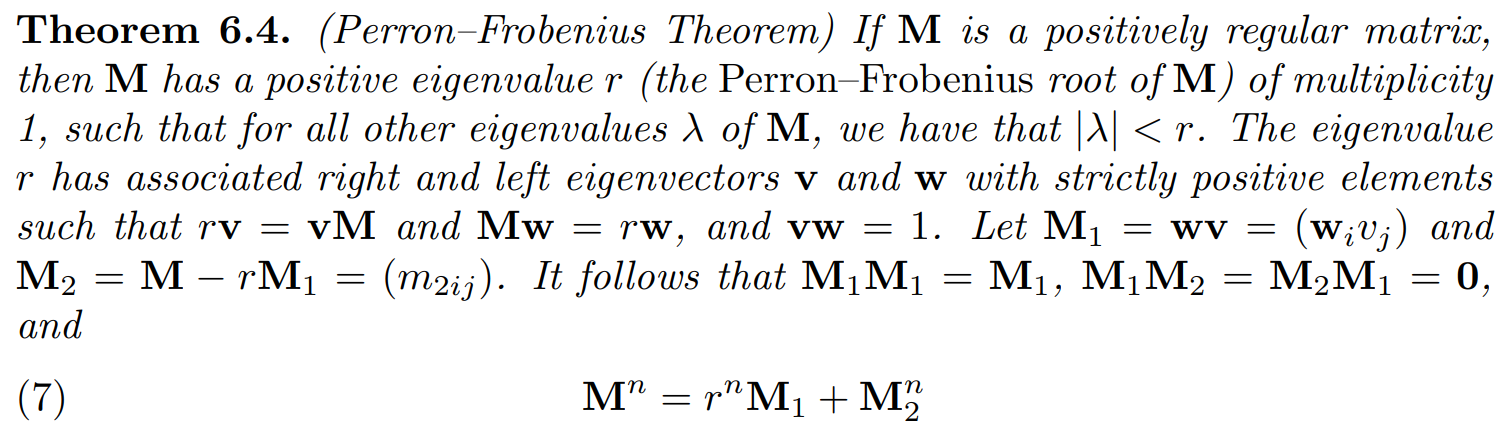

In [32]:
# obtener vectores y valores propios
right_eigenvalues, right_eigenvectors = np.linalg.eig(M)
left_eigenvalues, left_eigenvectors = np.linalg.eig(M.T)

Encontrar la raiz de Perron-Frobenius

In [33]:
print(left_eigenvalues)
print(right_eigenvalues)

[-0.60026548  0.89373936  1.89652612]
[-0.60026548  0.89373936  1.89652612]


In [34]:
r = right_eigenvalues[2]
print(r)

1.8965261199296746


In [35]:
left_eigenvectors

array([[ 0.79653901, -0.38102875,  0.4188024 ],
       [-0.60132031, -0.60672972,  0.41223206],
       [-0.0627653 ,  0.69763611,  0.80911636]])

In [36]:
right_eigenvectors

array([[ 0.78799907, -0.46094543,  0.4576548 ],
       [-0.60779276, -0.67118846,  0.53186088],
       [-0.09821114,  0.58054747,  0.71251392]])

Tomar $v$ y $w$, normalizarlos de acuerdo a lo que se pide

In [37]:
v_ = left_eigenvectors[:, 2] 
w_ = right_eigenvectors[:, 2]

In [38]:
# normalizar
v = v_
w = w_ / np.dot(v_, w_)

Comprobar que se tiene lo que se supone

In [39]:
# v es eigenvector por la izquierda
assert np.isclose(r*v, np.dot(v, M)).all()

In [40]:
# w es eigenvector por la derecha
assert np.isclose(r*w, np.dot(M, w)).all()

In [41]:
# su producto interno es 1
assert np.isclose(np.dot(v, w), 1)

Definir $M_1$ y $M_2$

In [42]:
M1 = np.outer(w, v)

In [43]:
M2 = M - r*M1

Comprobar lo que se tiene por el teorema

In [44]:
# M1*M1 = M1
assert np.isclose(np.dot(M1, M1), M1).all()

In [45]:
# M1*M2 = M2*M1
assert np.isclose(np.dot(M1, M2), np.dot(M2, M1)).all()

In [46]:
# M2*M1 = 0
assert np.isclose(np.dot(M1, M2), np.zeros((3, 3))).all()

In [47]:
# M^n = r^n M1 + M2^2
n = 2
M_n = np.linalg.matrix_power(M, n)
r_n = r**n
M2_n = np.linalg.matrix_power(M2, n)

assert np.isclose(M_n, r_n*M1 + M2_n).all()

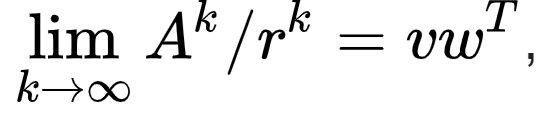

Aca $A$ es $M$

Recordar que el lado derecho es $M1$

In [48]:
k = 100

limite = np.linalg.matrix_power(M, k)/(r**k)

assert np.isclose(limite, M1).all()

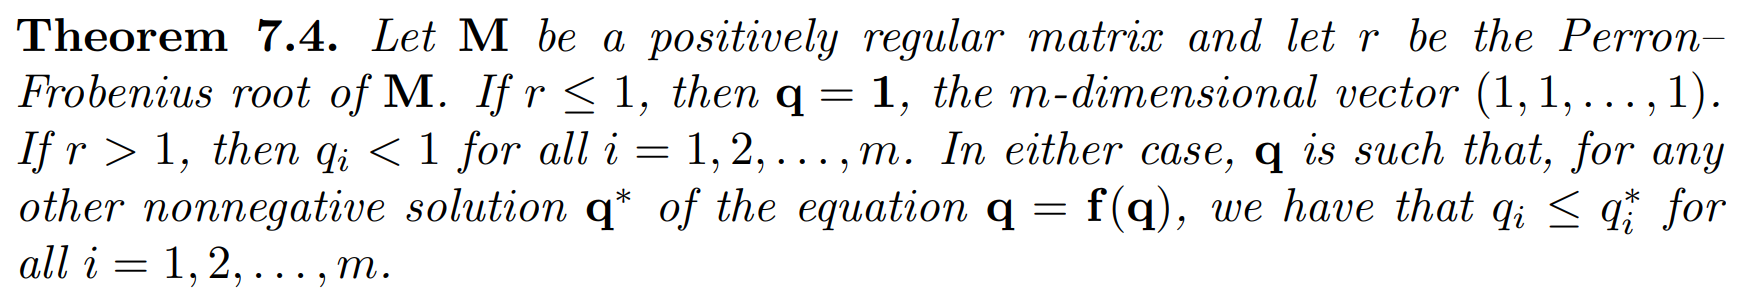

**q** $= (q_1, ..., q_m)$

Donde $q_i$ es la probabilidad de se extinga el proceso cuando $Z_0 = e_i$


In [49]:
r > 1

True

Por lo tanto, las probabilidades de extinción no son 1. Luego, sin importar en que tipo inicie el proceso, este podria nunca extinguirse

## Comprobar que se calcula la esperanza

Es decir, comprobar que

$E(Z_n | Z_{n-1}=v) = PHv$

Para calcular la esperanza (lado izquierdo) se calcula la siguiente generacion de v varias veces y se saca el promedio.

In [50]:
# obtener la media muestrar de la siguiente generacion
# dado el vector de la generacion actual
def media_muestral(k, n = 100):
    
    # obtener la muestra
    M = muestra_generacion_multitype_bp(transition_matrix=transition_matrix,
                                        offspring_distributions=offspring_distributions, 
                                        etiquetas=etiquetas, k=k, num_samples=n)
    
    # sacar la media
    media_m = M.mean(axis=0)
    
    # tambien dar la desviacion estandar promedio
    std_mean = M.std(axis=0).mean()
    
    return media_m , std_mean                 

In [51]:
v = np.array([3, 1, 2])
n= 80000

In [52]:
# Aproximar E(Z)
media_muestral(v, n)

(array([2.2429125, 3.685625 , 4.6752875]), 1.5515469770679289)

In [53]:
# La media calculada analiticamente
# con lo propuesto, E(Z)
np.dot(PH, v)

array([2.24, 3.69, 4.67])

### Checar sobre las proporciones

Si se sabe que $Z_{n-1} = v$

Ya se puede calcular la esperanza de $Z_n$.

Ahora quiero ver que pasa con las proporciones.

Sea $P_n$ la proporcion de etiquetas en la generacion $Z_n$.

Sea $g: \mathbb{R}^n \rightarrow \mathbb{R}^n$ $g(x) = \frac{x}{||x||_1}$.

$g$ es la funcion de normalizar, luego $P_n = g(Z_n)$.

Quiero calcular $E(P_n | Z_{n-1}=v)$

Esto es $E(g(Z_n) | Z_{n-1}=v)$

In [54]:
# funcion normalizar
def g(x):
    return x/x.sum()

In [55]:
# obtener la media muestrar de las proporciones de la siguiente generacion
# dado el vector de la generacion actual
def media_muestral_proporciones(k, n = 100):
    
    # obtener la muestra
    M = muestra_generacion_multitype_bp(transition_matrix=transition_matrix,
                                        offspring_distributions=offspring_distributions, 
                                        etiquetas=etiquetas, k=k, num_samples=n)
    
    # obtener las proporciones
    M_proporciones = np.array([g(x) for x in M])
    
    # sacar la media de las proporciones
    media = M_proporciones.mean(axis=0)
    
    # tambien dar la desviacion estandar promedio
    std_mean = M_proporciones.std(axis=0).mean()
    
    return media , std_mean                 

In [56]:
v = np.array([1, 3, 2])
n= 100000

In [57]:
# Aproximar E(g(Z))
media_muestral_proporciones(v, n)

(array([0.33582109, 0.26587899, 0.39829992]), 0.13382627154606896)

Ya se aproximó $E(g(Z_n))$

Ahora calcular $g(E(Z_n))$ para compararlas

In [58]:
# Aproximar g(E(Z))
m, _ = media_muestral(v, n)
g(m)

array([0.33624176, 0.26546158, 0.39829666])

In [59]:
# g(E(Z)) en su version analitica es g(PHv)
g(np.dot(PH, v))

array([0.33684211, 0.26578947, 0.39736842])

Parecen ser iguales. Es decir, parece ser que

$E(g(Z_n))$ = $g(E(Z_n))$


De ser, asi, entonces

$E(P_n) = E(g(Z_n)) = g(E(Z_n)) = g(PH v) = \frac{PH v}{<\text{vectorH}, v>}$

In [60]:
# De ser asi, E(g(Z)) analiticamente seria
np.dot(PH, v)/np.dot(vector_H, v)

array([0.33684211, 0.26578947, 0.39736842])

#### Es de interes demostrar que $𝐸(P𝑛) = 𝑔(𝐸(𝑍𝑛))$